<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

In [ ]:
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
duplicate_edges = 0
duplicate_edges_rev = 0

graph = nx.Graph()

with open("DBPedia.txt") as file:
  #diavazoume to arxeio grami-grami kai pernoume tis times gia tis akmes pou xwrizontai me keno.
    for line in file:
        u_str, v_str = line.split(' ')
        u, v = int(u_str) - 1, int(v_str) - 1
        duplicate_edges += graph.has_edge(u, v)
        duplicate_edges_rev += graph.has_edge(v, u)
        graph.add_edge(u, v)
print(graph)
print('Duplicate Edges:', duplicate_edges)
print('Duplicate Edges (reversed):', duplicate_edges_rev)

Graph with 430 nodes and 565 edges
Duplicate Edges: 0
Duplicate Edges (reversed): 0


**Σχόλιο:** Δεν υπάρχουν διπλές ακμές αλλά ουτε και ακμές  με αντιστροφή σείρα, αυτό ήταν αναμενόμενο μιας και αναφέρεται στο documentantion του dataset.

 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [ ]:
def graph_details(name, graph):
    initial_node_count = graph.number_of_nodes()
    initial_edge_count = graph.number_of_edges()
    initial_degree_avg = sum(nx.degree_centrality(graph).values()) / initial_node_count
    initial_connected_components = nx.number_connected_components(graph)
    print(name + " number of Nodes:", initial_node_count)
    print(name + " number of Edges:", initial_edge_count)
    print(name + " Average Degree of Nodes:", initial_degree_avg)
    print(name + " number of Connected Components:", initial_connected_components)
    return (initial_node_count, initial_edge_count, initial_degree_avg, initial_connected_components)

(initial_node_count, initial_edge_count, initial_degree_avg, initial_connected_components) = graph_details("Initial", graph)

Initial number of Nodes: 430
Initial number of Edges: 565
Initial Average Degree of Nodes: 0.0061256572884480125
Initial number of Connected Components: 95


<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [ ]:
unconnected_pairs = [
    (i, j) for i in range(initial_node_count)
    for j in range(i + 1, initial_node_count)
    if (i, j) not in graph.edges()
]

print("Number of Unconnected Pairs:", len(unconnected_pairs))

Number of Unconnected Pairs: 91671


<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [ ]:
# removable edges: check splitting and number of nodes
#if ( == initial_connected_components) and ( == initial_node_count): #uncomment and complete (modifications allowed)

In [ ]:
removable_edges = []
copy_graph = graph.copy()
for edge in graph.edges():
    # we create a copy of the graph in order to make the changes we need, and check if the conditions are satisfied
    copy_graph.remove_edge(*edge)
    copy_node_cοunt = copy_graph.number_of_nodes()
    copy_conn_comps = nx.number_connected_components(copy_graph)
    # remove edges that are not self edges && when deleted connected components and node count stays the same
    if (copy_conn_comps == initial_connected_components and copy_node_cοunt == initial_node_count and edge[0] != edge[1]):
        #the edges that are self pointed are not added to the set
        removable_edges.append(edge)
    else:
        copy_graph.add_edge(*edge)

print("Removable Edges:", len(removable_edges))

Removable Edges: 229


<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [ ]:
#dataframe of removable edges (they will function as positive samples)
#...['link'] = 1  #uncomment and complete

#dataframe of unconnected node pairs (they will function as negative samples)
#...['link'] = 0 # uncomment and complete

#merge in one dataframe

#build graph G'=G_reduced

In [ ]:
df_edges = unconnected_pairs + removable_edges
df_edges.sort()
df_links = []

for edge in df_edges:
    if edge in unconnected_pairs:   df_links.append(0)
    else:                           df_links.append(1)

df = pd.DataFrame({'edge': df_edges, 'link': df_links})

#build graph G' = G_reduced
G_reduced = graph.copy()
G_reduced.remove_edges_from(removable_edges)
df

,edge,link
0,"(0, 1)",1
1,"(0, 2)",1
2,"(0, 3)",1
3,"(0, 5)",0
4,"(0, 6)",0
...,...,...
91895,"(425, 429)",0
91896,"(426, 427)",0
91897,"(426, 428)",0
91898,"(426, 429)",0


In [ ]:
_, _, _, _ = graph_details("Reduced", G_reduced)

Reduced number of Nodes: 430
Reduced number of Edges: 336
Reduced Average Degree of Nodes: 0.0036428687591478492
Reduced number of Connected Components: 95


<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li>
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

In [ ]:
#def JCfunction(threshold_jc):   #uncomment and complete
#return recall_jc, precision_jc, accuracy_jc; #uncomment and complete

# k = Α.Μ. mod 10

Edge with the highest value [1.0] of JC Metrics: (3, 45)
For threshold equal to 0.1:
	Precision: 0.31287128712871287
	Recall: 0.6899563318777293
	Accuracy: 0.9954515778019587
For threshold equal to 0.15:
	Precision: 0.3162217659137577
	Recall: 0.6724890829694323
	Accuracy: 0.9955603917301414
For threshold equal to 0.25:
	Precision: 0.33482142857142855
	Recall: 0.6550218340611353
	Accuracy: 0.9958977149075081
For threshold equal to 0.5:
	Precision: 0.41389728096676737
	Recall: 0.5982532751091703
	Accuracy: 0.9968879216539717
For threshold equal to 1.0:
	Precision: 0.5101214574898786
	Recall: 0.5502183406113537
	Accuracy: 0.9975625680087051


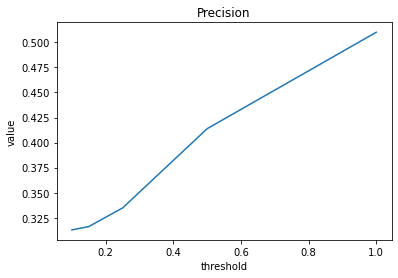

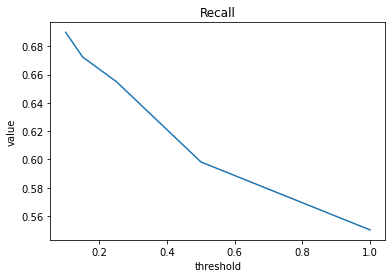

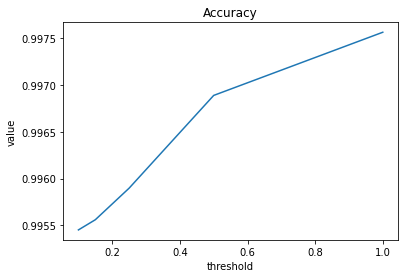

In [ ]:
# 2(i)
JC_preds = list(nx.algorithms.link_prediction.jaccard_coefficient(G_reduced))

# 2(ii)
# k = 1 -> 03117711
edge = None
max_p = 0

# find the highest pred value
for u, v, p in JC_preds:
    if p > max_p:
        max_p = p
        edge = (u, v)

print("Edge with the highest value [" + str(max_p) + "] of JC Metrics:", edge)

# 2(iii)
JC_p_vals = []
thresholds = [0.1, 0.15, 0.25, 0.5, 1.0]
precision_vals = []
recall_vals = []
accuracy_vals = []

# retrieve all preds in a list
for _, _, p in JC_preds:
    JC_p_vals.append(p)

# convert to array to be able to use np.where
JC_p_vals = np.array(JC_p_vals)

# function that calculates recall, precision, accuracy and returns a dictionary
def JCfunction(threshold):
    link_pred = np.where(JC_p_vals >= threshold, 1, 0)
    return {
        "precision": precision_score(df_links, link_pred),
        "recall": recall_score(df_links, link_pred),
        "accuracy": accuracy_score(df_links, link_pred)
    }

def visualize(name, values):
    plt.figure()
    plt.plot(thresholds, values)
    plt.title(name)
    plt.xlabel("threshold")
    plt.ylabel("value")

for threshold in thresholds:
    metrics_results = JCfunction(threshold)
    # save values to lists in order to visualize them in graphs
    precision_vals.append(metrics_results["precision"])
    recall_vals.append(metrics_results["recall"])
    accuracy_vals.append(metrics_results["accuracy"])
    # print the result
    print("For threshold equal to " + str(threshold) + ":")
    print("\tPrecision:", metrics_results["precision"])
    print("\tRecall:", metrics_results["recall"])
    print("\tAccuracy:", metrics_results["accuracy"])

visualize("Precision", precision_vals)
visualize("Recall", recall_vals)
visualize("Accuracy", accuracy_vals)

###Σχόλια:##
Στα αποτελέσματα φαίνεται μόνο μια ακμή με την μεγαλύτερη τιμή της μετρικής κάθως η εκφώνηση ζητάει να εμφανιστούν οι ΑΜ % 10 ακμές με τις μεγαλύτερες τιμές της μετρικής. Ο ΑΜ μου είναι 03118711 οπότε πέρνουμε μόνο μια.


<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

##Απάντηση 3(i):##
Μπορούμε να χρησιμοποιήσουμε Pearson Correlation Coefficient ο οποίος μπορεί να υλοποιήθέι με:
1.   SCIpy χρησιμοποιόντας την εντολή του scipy.stats:  **scipy.stats.pearsonr(x, y).correlation**
2.   Pandas χρησιμοποιόντας την εντολή **pandas.corr(x, y**). Η συγγεκριμένη εντολή πέρνει ως παράμετρο την μέθοδο συσχέτισης. Αν δεν οριστεί πέρνει by default την pearson correlation.
Ο συντελεστής συσχέτισης Pearson μετράει την  γραμμική συσχέτιση μεταξύ δυο χαρακτηριστικών. Η τιμή της είναι ο λόγος διακύμανσης της x και y ως προς το γινόμενο τον τυπικών αποκλίσεων τους.
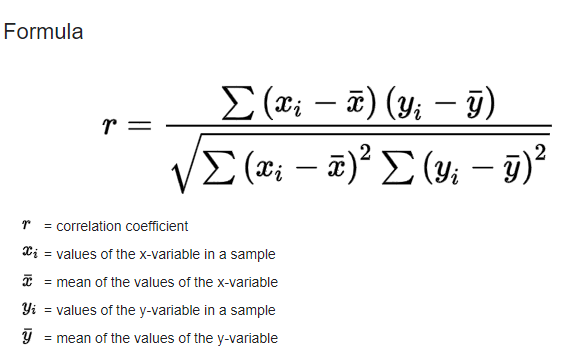

Οι τιμές που πέρνει η μεταβλητή r εχουν εύρος [-1,1] και υποδειλώνουν:


1.   Για r=1 υπάρχει τέλεια γραμμική σχέση μεταξύ του x και y. (perfect positive linear relationship)

2.   Για r>0 θετική σχέση μεταξύ του x και y.(positive correlation)

3.   Για r=0 δεν υπάρχει γραμμική συσχέτιση μεταξύ του x και y. (no linear relationship)
4.   Για r<0 αρνητική συσχέτιση μεταξύ του x και y.(negative correlation)
5.   Για r=-1 δεν υπάρχει τέλεια γραμμική σχέση μεταξύ του x και y.(perfect negative linear relationship)

**Ο λόγος επιλογής του Pearson Correlation Coefficient:** είναι το ότι συγγρίνη την γραμμική συσχέτιση και όχι τα ranks των δεδομένων.





In [ ]:
#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)

In [ ]:
#dataframe for similarity-based measurement values
#Jaccard Coefficient

#Preferential Attachment

#Resource Allocation

In [ ]:
#replicate of the dataframe "unconnected + removables"---dataframe will be used again in (4)
df_replica = df.copy()
# set edge as index
df_replica = df_replica.set_index('edge')

#Preferential Attachment
pref_att_preds = list(nx.algorithms.link_prediction.preferential_attachment(G_reduced))
pref_att_pred_vals = []
for u, v, p in pref_att_preds:
    pref_att_pred_vals.append(p)

#Resource Allocation
resource_alloc_preds = list(nx.algorithms.link_prediction.resource_allocation_index(G_reduced))
resource_alloc_pred_vals = []
for u, v, p in resource_alloc_preds:
    resource_alloc_pred_vals.append(p)

# add the new colums
df_replica = df_replica.assign(Jaccard_Coefficient = JC_p_vals, Preferential_Attatchment = pref_att_pred_vals, Resource_Allocation = resource_alloc_pred_vals)
df_replica

,link,Jaccard_Coefficient,Preferential_Attatchment,Resource_Allocation
edge,,,,
"(0, 1)",1,0.0,1,0.0
"(0, 2)",1,0.0,2,0.0
"(0, 3)",1,0.0,1,0.0
"(0, 5)",0,0.0,7,0.0
"(0, 6)",0,0.0,1,0.0
...,...,...,...,...
"(425, 429)",0,0.0,1,0.0
"(426, 427)",0,0.0,2,0.0
"(426, 428)",0,0.0,1,0.0


<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

X = df_replica[["Jaccard_Coefficient", "Preferential_Attatchment", "Resource_Allocation"]]
y = df_replica['link']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
# 3(iiia)
classifier = RandomForestClassifier()

from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

parameters = { 'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 15] }
model = GridSearchCV(classifier, param_grid = parameters)

In [ ]:
model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [ ]:
# 3(iiib) AM = 1 % 10 = 1 -> show the first prediction only
predictions = model.predict(X_test_scaled)
print("First Prediction:", predictions[0])
print("Accuracy:", accuracy_score(y_test, predictions))

First Prediction: 0
Accuracy: 0.9987377584330794


In [ ]:
#3(iiic)
edge1_47 = df_replica.loc[[(0, 46)]]
edge1_47_f = edge1_47[["Jaccard_Coefficient", "Preferential_Attatchment", "Resource_Allocation"]]
edge1_47_scaled = mm_scaler.transform(edge1_47_f)
edge1_47_proba = model.predict_proba(edge1_47_scaled)

print("Probability of Nodes 1 - 47 connecting:", edge1_47_proba[0][1])

Probability of Nodes 1 - 47 connecting: 0.00023888727986016414


<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων:
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [ ]:
#install node2vec with conda / pip
#from node2vec import Node2Vec   #uncomment
#import multiprocessing          #uncomment

#generate walks
#node2vec_walker = Node2Vec(, , , , , , ) #uncomment and complete

#train node2vec model
#n2v_model = node2vec_walker.fit(window= , min_count=1) #uncomment and complete

In [ ]:
!!pip install node2vec

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Requirement already satisfied: node2vec in /usr/local/lib/python3.8/dist-packages (0.4.6)',
 'Requirement already satisfied: joblib<2.0.0,>=1.1.0 in /usr/local/lib/python3.8/dist-packages (from node2vec) (1.2.0)',
 'Requirement already satisfied: networkx<3.0,>=2.5 in /usr/local/lib/python3.8/dist-packages (from node2vec) (2.8.8)',
 'Requirement already satisfied: gensim<5.0.0,>=4.1.2 in /usr/local/lib/python3.8/dist-packages (from node2vec) (4.3.0)',
 'Requirement already satisfied: numpy<2.0.0,>=1.19.5 in /usr/local/lib/python3.8/dist-packages (from node2vec) (1.21.6)',
 'Requirement already satisfied: tqdm<5.0.0,>=4.55.1 in /usr/local/lib/python3.8/dist-packages (from node2vec) (4.64.1)',
 'Requirement already satisfied: scipy>=1.7.0 in /usr/local/lib/python3.8/dist-packages (from gensim<5.0.0,>=4.1.2->node2vec) (1.7.3)',
 'Requirement already satisfied: FuzzyTM>=0.4.0 in /usr/lo

In [ ]:
from node2vec import Node2Vec
import multiprocessing

#generate walks
node2vec_walker = Node2Vec(
    G_reduced,
    p = 1.0,
    q = 1.0,
    dimensions = 128,
    num_walks = 10,
    walk_length = 80,
    workers = multiprocessing.cpu_count()
)

#train node2vec model
n2v_model = node2vec_walker.fit(window = 10, min_count = 1)

ValueError: ignored

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [ ]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
#uncomment:
#x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(df_with_target_var['node_1'], df_with_target_var['node_2'])]
X = [(n2v_model.wv[str(i)] + n2v_model.wv[str(j)]) for i, j in df["edge"]]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(, , random_state = 0)  #uncomment and complete
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
#uncomment whole cell
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

#classifier = RandomForestClassifier(max_depth=2, random_state=0)
#classifier.fit()   #uncomment and complete
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>